In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
1911,ham,Lol grr my mom is taking forever with my presc...
3521,ham,Im sorry bout last nite it wasnåÕt ur fault it...
2213,ham,"Goodmorning, today i am late for 2hrs. Because..."
4632,ham,Oh wow thats gay. Will firmware update help
3861,ham,"Customer place, i wil cal u sir."


In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2128,ham,Well I'm going to be an aunty!
3349,ham,Sorry i cant take your call right now. It so h...
3879,ham,Hi juan. Im coming home on fri hey. Of course ...
2005,ham,Can't take any major roles in community outrea...
2105,ham,I fetch yun or u fetch?


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

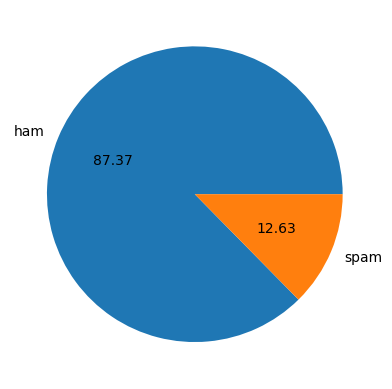

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [23]:
# Data is imbalanced
import nltk

In [24]:
!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)

C:\Users\HP\AppData\Local\Temp\ipykernel_2408\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_2408\192676766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_2408\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

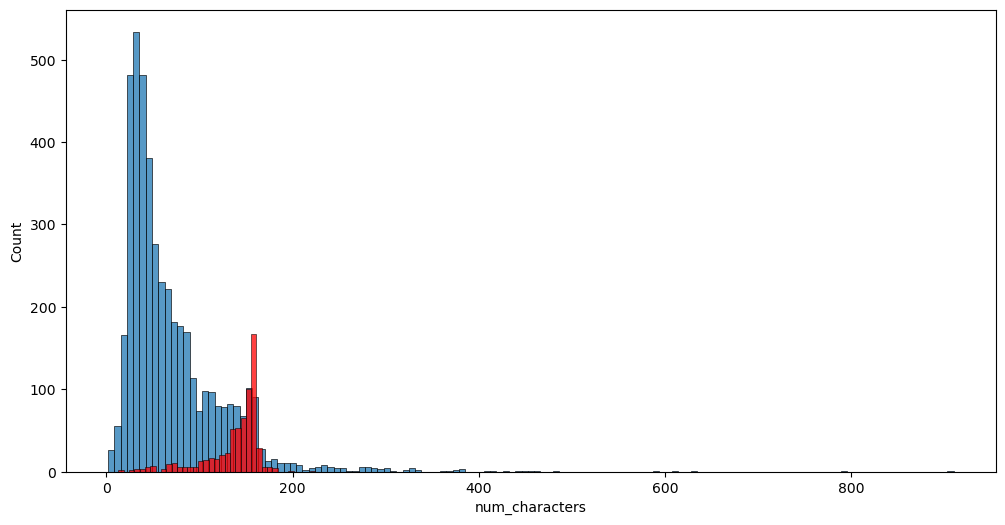

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

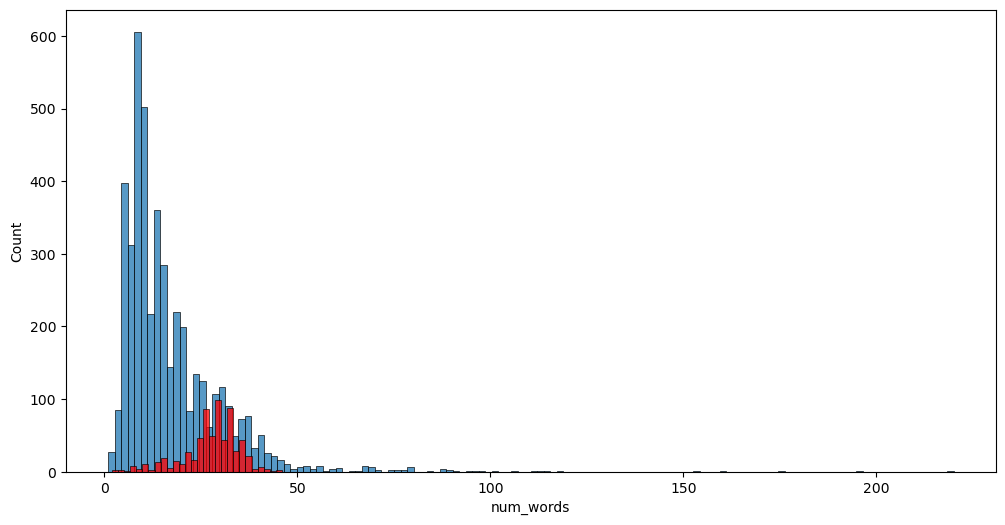

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

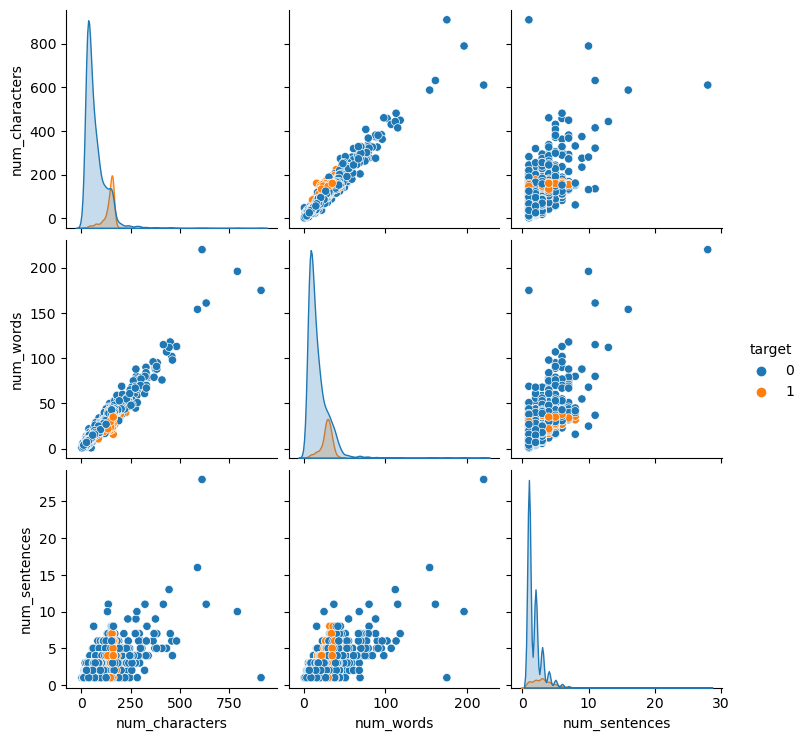

In [38]:
sns.pairplot(df,hue='target')

C:\Users\HP\AppData\Local\Temp\ipykernel_2408\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

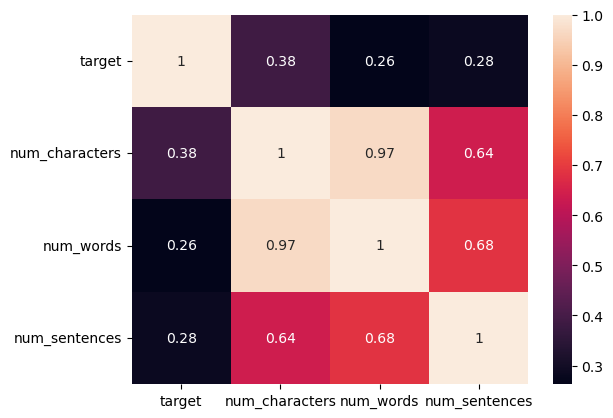

In [39]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    # Tokenize and normalize
    text = text.lower().split()  # Convert to lowercase and split into words
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))  # Perform stemming
    return " ".join(y)

# Test the function
print(transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


i'm gonna home soon want talk stuff anymor tonight, k? i'v cri enough today.


[nltk_data]   Package stopwords is already up-to-date!


In [43]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"i'm gonna home soon want talk stuff anymor tonight, k? i'v cri enough today."

In [44]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\HP\AppData\Local\Temp\ipykernel_2408\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail bugi n great wo..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

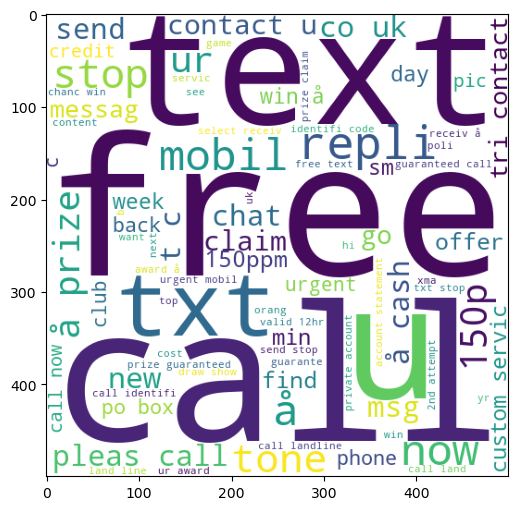

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

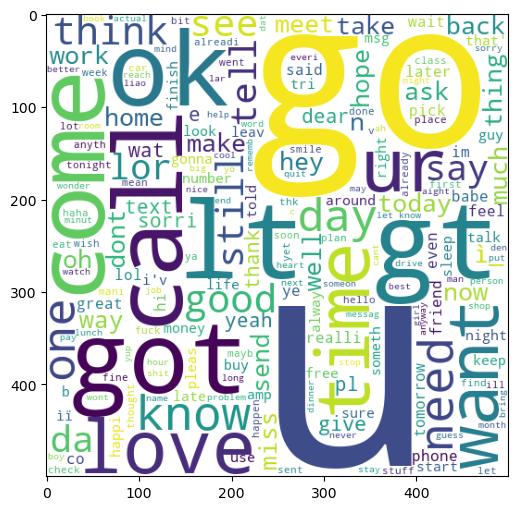

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail bugi n great wo..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [55]:
len(spam_corpus)

11075

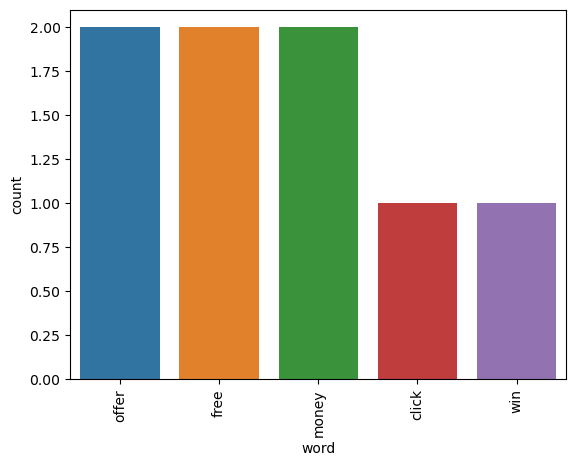

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Example spam_corpus for demonstration
spam_corpus = ["offer", "free", "money", "offer", "click", "free", "win", "money"]

# Count the most common words in the corpus
common_words = Counter(spam_corpus).most_common(30)

# Convert to a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the data
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

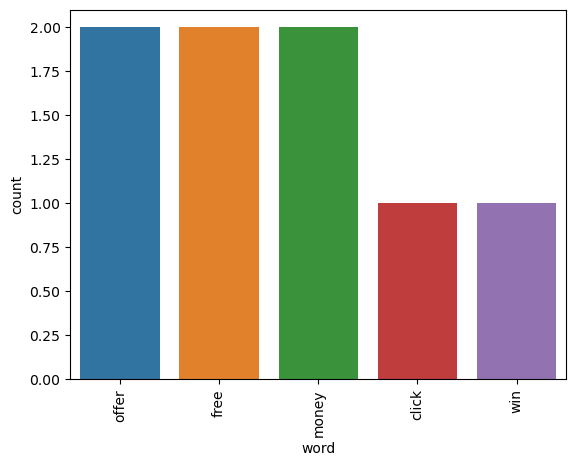

In [62]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example spam_corpus
#spam_corpus = ["offer", "free", "money", "offer", "click", "free", "win", "money"]

# Count the most common words in the corpus
common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
common_words_df = pd.DataFrame(common_words, columns=["word", "count"])

# Plot using sns.barplot
sns.barplot(x="word", y="count", data=common_words_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better visibility
plt.show()

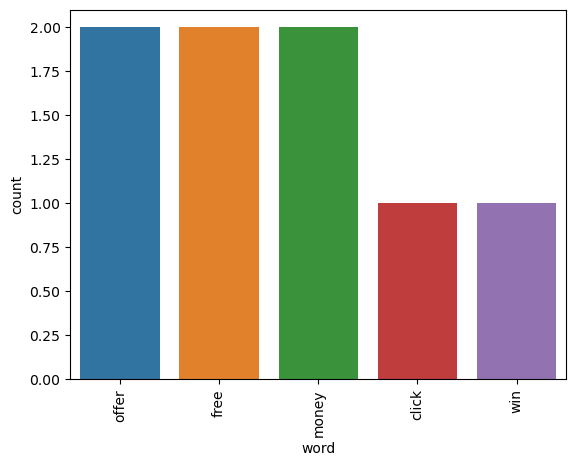

In [65]:
from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# Count the most common words in the corpus
common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
common_words_df = pd.DataFrame(common_words, columns=["word", "count"])

# Plot using sns.barplot
sns.barplot(x="word", y="count", data=common_words_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better visibility
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

38351

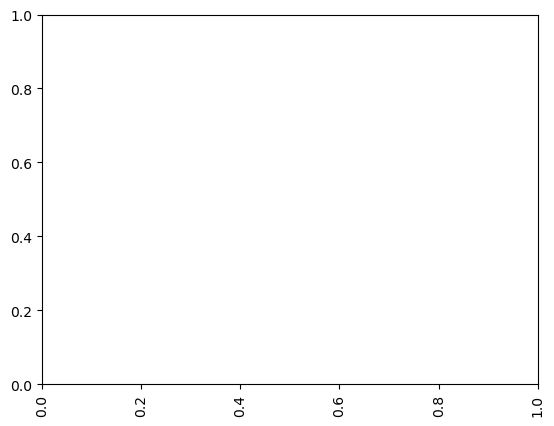

In [67]:
from collections import Counter
#sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail bugi n great wo..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


In [69]:
# Model Building

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [70]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [71]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [72]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [73]:
X.shape

(5169, 3000)

In [74]:
y = df['target'].values

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8771760154738878
[[791 105]
 [ 22 116]]
0.5248868778280543


In [80]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[895   1]
 [ 23 115]]
0.9913793103448276


In [81]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[896   0]
 [ 14 124]]
1.0


In [83]:
!pip install xgboost

     ------------------------------------ 124.9/124.9 MB 373.0 kB/s eta 0:00:00


In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Should work now without errors

# Example usage of XGBClassifier
model = XGBClassifier()
print("XGBClassifier initialized successfully!")

XGBClassifier initialized successfully!


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [86]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [87]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [88]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [89]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9672131147540983)

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9672131147540983
For  KN
Accuracy -  0.9032882011605415
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  DT
Accuracy -  0.9400386847195358
Precision -  0.88
For  LR
Accuracy -  0.9593810444874274
Precision -  0.9444444444444444
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9912280701754386
For  AdaBoost
Accuracy -  0.965183752417795
Precision -  0.9473684210526315
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.873015873015873
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.8910891089108911
For  xgb
Accuracy -  0.971953578336557
Precision -  0.936


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [92]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903288,1.000000
2,NB,0.976789,0.991379
5,RF,0.974855,0.991228
8,ETC,0.978723,0.975410
0,SVC,0.976789,0.967213
6,AdaBoost,0.965184,0.947368
4,LR,0.959381,0.944444
10,xgb,0.971954,0.936000
9,GBDT,0.942940,0.891089
3,DT,0.940039,0.880000


In [93]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [94]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903288
1,NB,Accuracy,0.976789
2,RF,Accuracy,0.974855
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.976789
5,AdaBoost,Accuracy,0.965184
6,LR,Accuracy,0.959381
7,xgb,Accuracy,0.971954
8,GBDT,Accuracy,0.942940
9,DT,Accuracy,0.940039


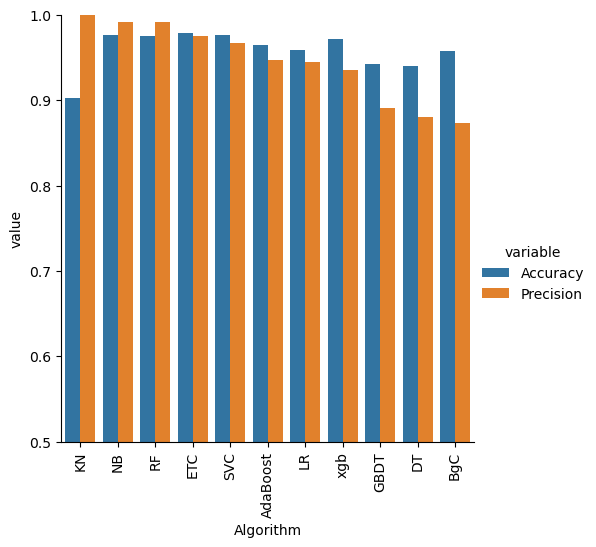

In [95]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [98]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [99]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [101]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000
1,NB,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
2,RF,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228
3,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
4,SVC,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213
5,AdaBoost,0.965184,0.947368,0.965184,0.947368,0.965184,0.947368,0.965184,0.947368
6,LR,0.959381,0.944444,0.959381,0.944444,0.959381,0.944444,0.959381,0.944444
7,xgb,0.971954,0.936000,0.971954,0.936000,0.971954,0.936000,0.971954,0.936000
8,GBDT,0.942940,0.891089,0.942940,0.891089,0.942940,0.891089,0.942940,0.891089
9,DT,0.940039,0.880000,0.940039,0.880000,0.940039,0.880000,0.940039,0.880000


In [102]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [103]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [104]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [105]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [106]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [107]:
from sklearn.ensemble import StackingClassifier

In [108]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [109]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9624060150375939


In [4]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [114]:
import os
print(os.getcwd())


C:\Users\HP


In [5]:
import pickle

# Load the vectorizer.pkl file
with open("C:\\Users\\HP\\vectorizer.pkl", "rb") as file:
    vectorizer = pickle.load(file)

# Check the contents or type of the object
print(type(vectorizer))
print(vectorizer)

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
TfidfVectorizer(stop_words='english')


In [6]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pickle

# Assuming you already have your dataset, e.g., X (features) and y (labels)
# For example, let's create a simple dataset:
X = ['text data example 1', 'text data example 2', 'another text 3', 'more text 4']
y = [0, 1, 0, 1]  # Labels corresponding to the examples

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer and transform the training data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Initialize and train the Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)  # This is where the error occurred earlier

# Save the model and vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open('mnb_model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Example: assume X_train and y_train are already defined
tfidf = TfidfVectorizer()

# Transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Initialize and train the Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save the model and vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open('mnb_model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)


In [11]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train=["Sample text 1", "Sample text2", "Sample text 3"]
Y_train=[0, 1, 0]

tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tdidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)


# Save the model
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)

In [14]:
import os
print(os.path.exists("c:/Users/HP/vectorizer.pkl"))

True


In [15]:
import os
print(os.path.exists("c:/Users/HP/model.pkl"))

True


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Sample training data
corpus = [
    "I love programming in Python",
    "Java is also a great language",
    "I enjoy solving problems using code",
    "Programming can be challenging but rewarding",
    "I dislike debugging code",
]
labels = [1, 1, 1, 1, 0]  # Example binary labels (1=positive, 0=negative)

# Step 1: Create and fit the vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Step 2: Train the MultinomialNB model
model = MultinomialNB()
model.fit(X, labels)

# Step 3: Save the vectorizer and model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [7]:
import pickle

# Step 1: Load the vectorizer and model
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Step 2: Prepare input for prediction
user_input = ["hy my name is sneha"]  # Replace this with any input
vector_input = vectorizer.transform(user_input)  # Vectorize input

# Check feature alignment
print(f"Vectorized input shape: {vector_input.shape}")
print(f"Model expects: {model.feature_count_.shape[1]} features")

# Step 3: Predict the output
if vector_input.shape[1] == model.feature_count_.shape[1]:  # Ensure feature match
    result = model.predict(vector_input)[0]
    print("Prediction:", result)
else:
    print("Error: Input feature mismatch! Retrain model/vectorizer with consistent data.")

Vectorized input shape: (1, 21)
Model expects: 21 features
Prediction: 1


In [8]:
import pickle

# Step 1: Load the vectorizer and model
try:
    with open('vectorizer.pkl', 'rb') as vec_file:
        vectorizer = pickle.load(vec_file)

    with open('model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# Step 2: Input for prediction
user_input = ["hy my name is sneha"]

# Step 3: Transform input using the vectorizer
try:
    vector_input = vectorizer.transform(user_input)
except Exception as e:
    print(f"Error during vectorization: {e}")
    exit()

# Step 4: Check feature alignment
if vector_input.shape[1] != model.feature_count_.shape[1]:
    print(f"Feature mismatch: Input has {vector_input.shape[1]} features, but model expects {model.feature_count_.shape[1]} features.")
    print("Retrain the model and vectorizer with consistent data.")
    exit()

# Step 5: Predict the result
try:
    result = model.predict(vector_input)[0]
    print("Prediction:", result)
except Exception as e:
    print(f"Error during prediction: {e}")
    exit()

Prediction: 1


In [9]:
# Check the feature space of the vectorizer
print("Vectorizer features:", vectorizer.get_feature_names_out())
print("Input shape:", vector_input.shape)
print("Model expects:", model.feature_count_.shape[1])

Vectorizer features: ['also' 'be' 'but' 'can' 'challenging' 'code' 'debugging' 'dislike'
 'enjoy' 'great' 'in' 'is' 'java' 'language' 'love' 'problems'
 'programming' 'python' 'rewarding' 'solving' 'using']
Input shape: (1, 21)
Model expects: 21


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Example training data
corpus = [
    "I love programming in Python",
    "Java is a versatile language",
    "Debugging is part of coding",
    "I dislike syntax errors",
    "Programming challenges are rewarding",
]
labels = [1, 1, 1, 0, 1]  # Example binary labels (1 = positive, 0 = negative)

# Step 1: Fit the vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Step 2: Train the MultinomialNB model
model = MultinomialNB()
model.fit(X, labels)

# Step 3: Save the vectorizer and model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model and vectorizer trained and saved successfully!")

Model and vectorizer trained and saved successfully!


In [11]:
import pickle

# Step 1: Load the vectorizer and model
with open('vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Step 2: Input for prediction
user_input = ["hy my name is sneha"]  # Replace this with your input
vector_input = vectorizer.transform(user_input)

# Step 3: Check feature alignment
if vector_input.shape[1] != model.feature_count_.shape[1]:
    print(f"Feature mismatch: Input has {vector_input.shape[1]} features, but model expects {model.feature_count_.shape[1]} features.")
    print("Retrain the model and vectorizer with consistent data.")
    exit()

# Step 4: Predict the result
result = model.predict(vector_input)[0]
print("Prediction:", result)

Prediction: 1


In [12]:
print("Vectorized input shape:", vector_input.shape)
print("Model expects:", model.feature_count_.shape[1])

Vectorized input shape: (1, 18)
Model expects: 18


In [13]:
import pickle

# Load the vectorizer and model
try:
    with open('vectorizer.pkl', 'rb') as vec_file:
        vectorizer = pickle.load(vec_file)

    with open('model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# Step 2: Input for prediction
user_input = ["hy my name is sneha"]

# Step 3: Transform the input using the vectorizer
try:
    vector_input = vectorizer.transform(user_input)
    print("Vectorized Input Shape:", vector_input.shape)
except Exception as e:
    print(f"Error during vectorization: {e}")
    exit()

# Step 4: Check feature alignment with model
print(f"Model expects {model.feature_count_.shape[1]} features")
print(f"Input has {vector_input.shape[1]} features")

if vector_input.shape[1] != model.feature_count_.shape[1]:
    print("Feature mismatch! Retrain the model and vectorizer with consistent data.")
    exit()

# Step 5: Make prediction
try:
    result = model.predict(vector_input)[0]
    print("Prediction:", result)
except Exception as e:
    print(f"Error during prediction: {e}")
    exit()

Vectorized Input Shape: (1, 18)
Model expects 18 features
Input has 18 features
Prediction: 1


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Example training data
corpus = [
    "I love programming in Python",
    "Java is a versatile language",
    "Debugging is part of coding",
    "I dislike syntax errors",
    "Programming challenges are rewarding"
]
labels = [1, 1, 1, 0, 1]  # Example labels (1 = positive, 0 = negative)

# Train the vectorizer and model
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X, labels)

# Save the vectorizer and model
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [15]:
print("Vectorizer Vocabulary:", vectorizer.get_feature_names_out())

Vectorizer Vocabulary: ['are' 'challenges' 'coding' 'debugging' 'dislike' 'errors' 'in' 'is'
 'java' 'language' 'love' 'of' 'part' 'programming' 'python' 'rewarding'
 'syntax' 'versatile']


In [16]:
# During training, after vectorizing the training corpus
print("Training vectorized shape:", X.shape)  # Check the number of features

Training vectorized shape: (5, 18)


In [17]:
# During prediction
print("Prediction input shape:", vector_input.shape)  # Should match the training input shape

Prediction input shape: (1, 18)


In [18]:
print("Model expects features:", model.feature_count_.shape[1])


Model expects features: 18


In [19]:
result = model.predict(vector_input)[0]
print("Prediction:", result)

Prediction: 1


In [20]:
import pickle
import numpy as np

# Load the saved vectorizer and model
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Check the model's expected feature count
print("Model expects features:", model.feature_count_.shape[1])

# Input for prediction
user_input = ["hy my name is sneha"]

# Transform the input using the same vectorizer
vector_input = vectorizer.transform(user_input)

# Print the shape of the vectorized input
print("Vectorized input shape:", vector_input.shape)

# Ensure that the feature count matches between input and model
if vector_input.shape[1] == model.feature_count_.shape[1]:
    result = model.predict(vector_input)[0]
    print("Prediction:", result)
else:
    print(f"Feature mismatch: Input has {vector_input.shape[1]} features, but model expects {model.feature_count_.shape[1]} features.")

Model expects features: 18
Vectorized input shape: (1, 18)
Prediction: 1


In [1]:
import pickle

# Load the saved vectorizer and model
with open('vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Example training data
corpus = [
    "I love programming in Python",
    "Java is a versatile language",
    "Debugging is part of coding",
    "I dislike syntax errors",
    "Programming challenges are rewarding"
]
labels = [1, 1, 1, 0, 1]  # Example labels (1 = positive, 0 = negative)

# Train the vectorizer and model
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X, labels)

# Save the vectorizer and model
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [4]:
import pickle

# Load the saved vectorizer and model
with open('vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Example new text data (ensure the words are in the original vocabulary)
new_corpus = ["I enjoy solving programming problems"]

# Transform the new data with the same vectorizer (this ensures the same feature space)
X_new = vectorizer.transform(new_corpus)

# Predict the sentiment using the trained model
prediction = model.predict(X_new)

print("Prediction:", prediction)


Prediction: [1]


In [5]:
# New example inputs for testing
new_corpus = [
    "I dislike debugging errors",
    "I love learning new programming languages",
    "The code is full of bugs"
]

# Transform the new data
X_new = vectorizer.transform(new_corpus)

# Predict the sentiment for the new data
predictions = model.predict(X_new)

print("Predictions:", predictions)


Predictions: [1 1 1]


In [6]:
# Expanded training data with more balanced positive and negative samples
expanded_corpus = [
    "I love programming in Python",
    "Java is a versatile language",
    "Debugging is part of coding",
    "I dislike syntax errors",
    "Programming challenges are rewarding",
    "I hate debugging errors",
    "I am frustrated by this bug",
    "Learning new languages is exciting",
    "The code is full of bugs",
    "I dislike poor documentation"
]

# Expanded labels (1 = positive, 0 = negative)
expanded_labels = [1, 1, 1, 0, 1, 0, 0, 1, 0, 0]

# Train the vectorizer and model again
vectorizer = TfidfVectorizer()
X_expanded = vectorizer.fit_transform(expanded_corpus)

# Train the Naive Bayes model again
model = MultinomialNB()
model.fit(X_expanded, expanded_labels)

# Save the updated vectorizer and model
with open('expanded_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

with open('expanded_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model and vectorizer saved successfully with expanded data!")


Model and vectorizer saved successfully with expanded data!


In [7]:
import pickle

# Load the updated vectorizer and model
with open('expanded_vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

with open('expanded_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Example new text data for prediction
new_corpus = [
    "I love working on coding challenges",
    "Debugging this program is so frustrating",
    "Learning new languages is always fun",
    "This code is full of errors"
]

# Transform the new data with the updated vectorizer
X_new = vectorizer.transform(new_corpus)

# Predict the sentiment using the updated model
predictions = model.predict(X_new)

# Print the predictions (1 = positive, 0 = negative)
print("Predictions:", predictions)


Predictions: [1 0 1 0]


In [8]:
# Check the number of features (terms in the vocabulary) used by the vectorizer
num_features = len(vectorizer.get_feature_names_out())
print(f"Number of features (terms) in the vocabulary: {num_features}")


Number of features (terms) in the vocabulary: 34
